Positive tweets percentage: 40 %
Negative tweets percentage: 12 %
Neutral tweets percentage: 46 %


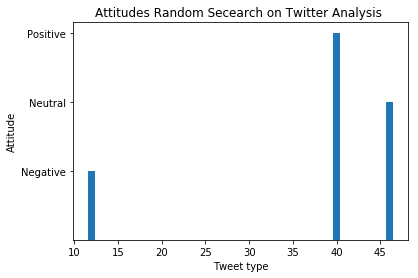



Positive tweets:
RT @ESPNLosAngeles: Kobe event nets fitting $824K in jersey sales https://t.co/zgnYNpZZG6 #Lakers https://t.co/OLdJUQ2h90
RT @BleacherReport: $824,000 worth of merchandise was sold on Kobe Bryant’s jersey retirement day https://t.co/BTE2AXrroy https://t.co/aoaz…
RT @NBA2K_MyTEAM: Also, play two new Kobe Moments Challenges! Moments: Kobe’s Farewell rewards you a Ruby Kobe Bryant, and Moments: Kobe 81…
$824,000 worth of merchandise was sold on Kobe Bryant’s jersey retirement... https://t.co/oc8cti5ZZn by… https://t.co/culhaXL5iK
#WizKids #DCRising #WizardsTalk John Wall says Russell Westbrook is most like Kobe Bryant in today's game in o.. https://t.co/riC3LICwCW


Negative tweets:
RT @LakersNation: Kobe came in off the bench and hit a game-winner on this day in Lakers history.
https://t.co/t8mDZFCxNJ https://t.co/nYQg…
RT @go90Sports: WATCH: Kobe Bryant’s farewell to the game he loves in the animated short Dear Basketball.
RT @LakersNation: Kobe single-handedly outsco

In [2]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
 
class TwitterClient(object):
    def __init__(self):
        consumer_key = 'KgdYjhKeHCriADTdJ0uHRhfiY'
        consumer_secret = '3nOXxsdF0f0pi9xZeKjEi3pnqFIK0uaiLqPOxwvPXsMu3MnFhh'
        access_token = '2248216188-lWfyTkz5YwsIgz54j6gn6XFa0Hd3JKcfd4nCrEB'
        access_token_secret = 'gfli08nvjOsnw0ts3qWGXXcnGg6c5mjFXCI0qegE6C5xm'
 
        # authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))

        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):

        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                parsed_tweet = {}
                parsed_tweet['text'] = tweet.text
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                if tweet.retweet_count > 0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(query = 'kobe bryant', count = 1000)
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    
    neg = int(format(100*len(ntweets)/len(tweets)))
    neu = int(format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    pos = int(format(100*len(ptweets)/len(tweets)))
    x = [neg,neu,pos]
    y = [1,2,3]
    label = ['Negative','Neutral','Positive']
    plt.yticks(y,label)
    plt.title('Attitudes Random Secearch on Twitter Analysis ')
    plt.xlabel('Tweet type')
    plt.ylabel('Attitude')
    plt.bar(x,y)
    plt.show()
    

    print("\n\nPositive tweets:")
    for tweet in ptweets[:5]:
        print(tweet['text'])
 

    print("\n\nNegative tweets:")
    for tweet in ntweets[:5]:
        print(tweet['text'])
if __name__ == "__main__":
    main()